In [1]:
ls

murka/  Murka_test_DDA_2018.xlsx  requirements.txt  test_task.ipynb


## Тестовое задание					
## Компания Murka					
## Вакансия Data Discovery Analyst					
					
Задания можно выполнять используя Excel, R, Python.					
					
					
По окончанию задания, пожалуйста укажите, сколько часов было потрачено на выполнение: 16 часов					
Желаем удачи!

### Задание 1
					
Исходные данные:					
Игра - Покер.					
Игра относится к категории free-to-play (с возможностью совершать внутренние покупки: покерные фишки, аватарки и т.п.).					
Обналичить выигранные фишки невозможно.					
					
На листе "Данные" представлена информация о пользователях-плательщиках, которые были активны (т.е. совершили хотя бы 1 логин) за последние 30 дней.					
					
Краткое описание данных:					
					
| Поле | Описание |
|----------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id | Уникальный идентификатор пользователя в базе данных |
| Birth_y | Год рождения |
| Sex | Пол |
| LifeTime | Время жизни пользователя в игре (дней) |
| LastLog_days_ago | Прошло дней с момента последнего логина |
| LastPayment_days_ago | Прошло дней с момента последнего платежа |
| Sessions | Количество сессий (логинов) за всю жизнь пользователя в игре |
| Payments | Количество платежей за всю жизнь пользователя в игре |
| Money | Сумма платежей за всю жизнь пользователя в игре (в рублях) |
| Level | Уровень, которого достиг пользователь в игре на текущий момент(уровень присваивается на основании опыта в игре: количества сыгранных раундов, выигранных фишек и т.п.) |



In [1]:
# Import libraries
import pandas as pd
import datetime as dt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format
base_year = 2015

# Import data
df_data = pd.read_excel('Murka_test_DDA_2018.xlsx', 'Данные', header=2)
df_data.head()

id  Birth_y     Sex  LifeTime  LastLog_days_ago  LastPayment_days_ago  \
0   1     1962  female    863.55             18.55                841.56   
1   2     1972  female    498.55              1.55                  3.56   
2   3     1970    male    333.55             17.55                333.56   
3   4     1962    male    148.55             18.55                144.56   
4   5     1956    male    149.55              1.55                102.56   

   Sessions  Payments  Money  Level  
0        21         1   1.00     34  
1       489        25  27.77     44  
2         5         1   4.99      4  
3       512         2   2.98     68  
4       327         4  61.97     83

In [2]:
df_data.describe(percentiles=[x/10 for x in range(1, 10)])

id  Birth_y  LifeTime  LastLog_days_ago  LastPayment_days_ago  \
count 6,344.00 6,344.00  6,344.00          6,344.00              6,344.00   
mean  3,172.50 1,960.16    277.54              7.78                130.43   
std   1,831.50    13.15    182.45              8.05                130.81   
min       1.00 1,905.00      4.55              0.55                  0.56   
10%     635.30 1,945.00     74.55              1.55                  8.56   
20%   1,269.60 1,950.00    111.55              1.55                 20.16   
30%   1,903.90 1,954.00    171.55              1.55                 36.56   
40%   2,538.20 1,957.00    227.75              2.55                 59.56   
50%   3,172.50 1,960.00    255.55              3.55                 86.56   
60%   3,806.80 1,963.00    272.35              6.55                126.56   
70%   4,441.10 1,967.00    319.55              9.55                176.56   
80%   5,075.40 1,970.00    385.55             14.55                231.56   
90%   5,709.70 1,976.00    498.55             21.55                298.56   
max   6,344.00 2,000.00    921.55             29.55                902.56   

       Sessions  Payments     Money    Level  
count  6,344.00  6,344.00  6,344.00 6,344.00  
mean     274.37      9.42    115.33    70.64  
std      410.21     19.13    537.28   119.82  
min        1.00      1.00      0.99     1.00  
10%       18.00      1.00      0.99    11.00  
20%       36.00      1.00      2.97    17.00  
30%       62.00      2.00      4.99    22.00  
40%       96.20      3.00      9.95    28.00  
50%      141.00      4.00     14.98    37.00  
60%      200.80      5.00     24.99    46.00  
70%      287.00      8.00     44.96    59.00  
80%      409.00     12.00     88.92    80.00  
90%      671.00     22.00    219.80   131.00  
max    8,069.00    435.00 24,194.42   999.00

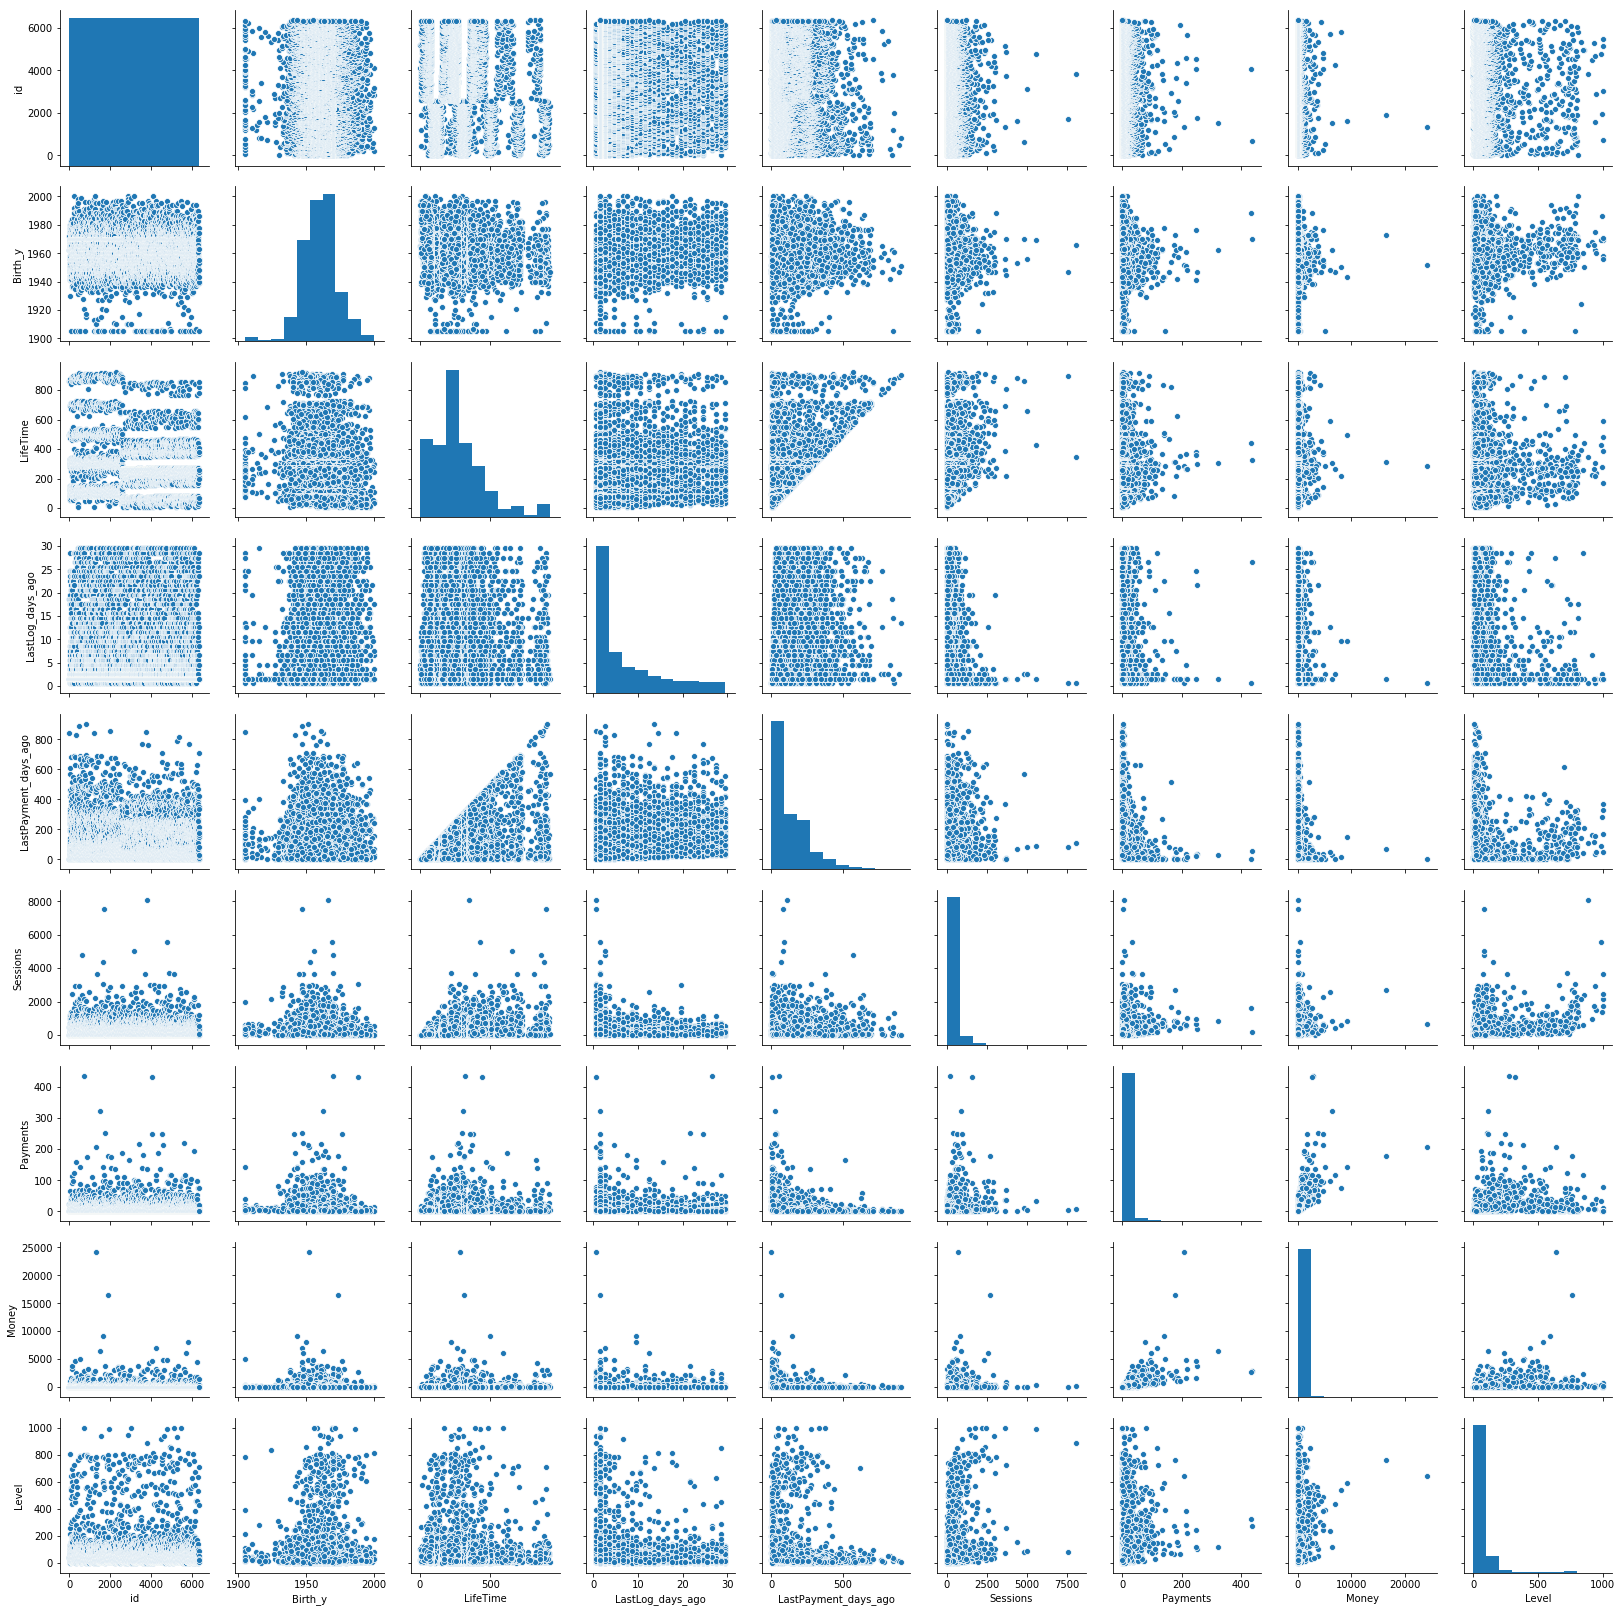

In [3]:
sns.pairplot(df_data)

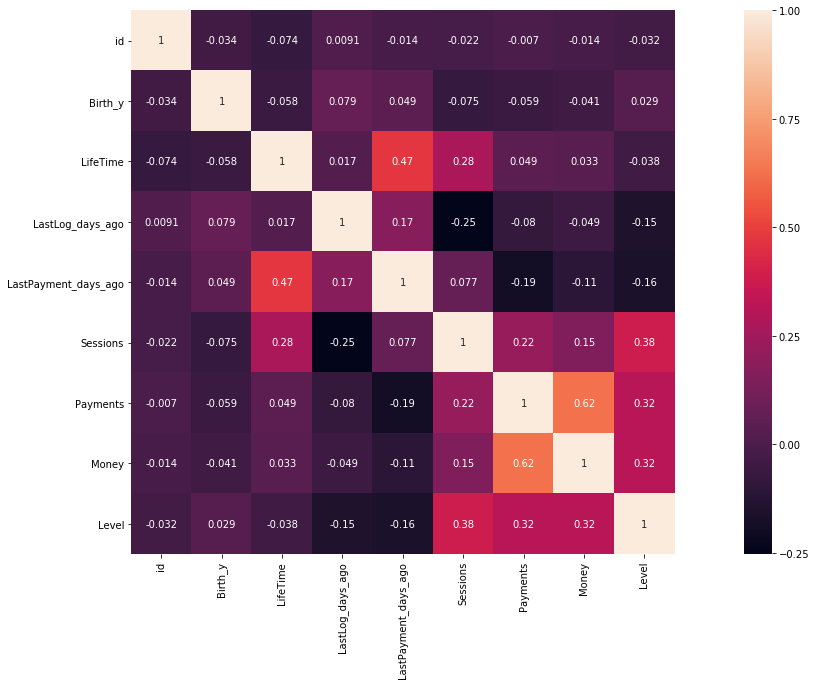

In [4]:
plt.figure(figsize=(25, 10))
sns.heatmap(df_data.corr(), vmax=1.0, square=True, annot=True)

### Вопросы
							
**1.1. Рассчитайте долю пользователей, которые совершили последний логин более 1-х недель назад.**	

In [5]:
out_1_1 = df_data[df_data.LastLog_days_ago > 7].id.count() / df_data.shape[0]
print("Пользователей, которые совершили последний логин более 1-х недель назад: {0:.0%}".format(out_1_1))

Пользователей, которые совершили последний логин более 1-х недель назад: 37%


___________
**1.2. Какое среднее количество сессий у пользователей, которые установили игру более года назад?**

In [6]:
out_1_2 = df_data[df_data.LifeTime > 365].Sessions.mean()
print("Cреднее количество сессий у пользователей, которые установили игру более года назад: {0:.2f}".format(out_1_2))

Cреднее количество сессий у пользователей, которые установили игру более года назад: 427.23


___________
**1.3. Сделайте анализ игровой аудитории в зависимости от их пола и возраста.**

In [7]:
df_data['age'] = base_year - df_data.Birth_y
df_data['age_group'] = (df_data.age // 25 ) * 25
dfg_data = (df_data
            .groupby(['Sex', 'age_group'])
            .agg({'id':'count', 
                'LifeTime':['mean', 'median'],
                'LastLog_days_ago':['mean', 'median'],
                'LastPayment_days_ago':['mean', 'median'],
                'Sessions':['mean', 'median'],
                'Payments':['mean', 'median'],
                'Money':['mean', 'median'],
                'Level':['mean', 'median'],
                'age':['mean', 'median']
                })
         )
dfg_data

id LifeTime        LastLog_days_ago         \
                 count     mean median             mean median   
Sex    age_group                                                 
female 0            27   254.84 179.55             8.51   5.55   
       25          635   255.24 251.55             8.39   4.55   
       50         1669   250.71 236.55             7.24   2.55   
       75          117   279.41 248.55             7.32   2.55   
       100          29   234.75 242.55            10.10   4.55   
male   0            58   253.20 211.55            12.01  11.05   
       25         1375   271.82 260.55             8.55   5.55   
       50         2232   306.41 265.55             7.53   3.55   
       75          118   337.47 293.55             6.34   2.55   
       100          29   334.79 258.55             6.03   2.55   

                 LastPayment_days_ago        Sessions        Payments         \
                                 mean median     mean median     mean median   
Sex    age_group                                                               
female 0                       139.04 110.56   207.19 134.00     4.37      3   
       25                      127.88  89.56   255.79 126.00     8.94      4   
       50                      114.91  79.56   280.77 163.00    10.42      5   
       75                      108.66  73.56   292.92 137.00    12.14      5   
       100                     106.84 104.56   233.24 169.00    11.90      5   
male   0                       140.97  82.56   121.71  67.00     2.48      1   
       25                      141.99 100.56   234.47 106.00     7.83      3   
       50                      137.28  83.56   300.54 161.00     9.81      4   
       75                      134.11  83.56   322.67 137.50     9.49      4   
       100                     150.28  95.56   296.14 214.00     5.52      4   

                  Money         Level           age         
                   mean median   mean median   mean median  
Sex    age_group                                            
female 0          23.89   5.99 110.04     45  20.63     21  
       25        116.80  13.99  82.28     36  41.91     45  
       50        106.94  19.96  68.44     39  60.54     60  
       75        130.37  20.95  50.68     40  78.46     78  
       100       222.96  19.93  66.72     43 108.52    110  
male   0          13.13   2.00  68.45     25  20.43     21  
       25         79.99  10.96  69.75     34  41.80     44  
       50        144.39  15.98  70.07     38  59.71     59  
       75        106.04  17.94  63.88     36  79.12     77  
       100        25.54   8.98  68.41     33 107.90    110

**1.4. Являются ли данные о возрасте игроков симметричными относительно среднего значения?**

In [8]:
age_stats = {"mean: ":df_data.age.mean(), 
             "median: ":df_data.age.median(), 
             "kurtosis: ":df_data.age.kurtosis(), 
             "skew: ":df_data.age.skew()
            }
for key, value in age_stats.items():
    print("{}: {:.3f}".format(key, value))

mean: : 54.844
median: : 55.000
kurtosis: : 1.844
skew: : 0.326


Данные возраста игроков несимметричны:
- среднее значение больше чем медиана
- выборка показывает позитивный параметр skew 0.396 (распределение смещено от средней в сторону 0)
- позитивное значение kurtosis указывает на повышенную концентрации около среднего возраста (50.3 года)

**1.5. Какие значения возраста игроков, по Вашему мнению, являются аномальными? Предложите правило отбора таких игроков.**

1) Если полагаться на статистику интернет пользователей, то возраст свыше 90 можно считать аномальным (базовый год 2015).

In [9]:
df_data[df_data.age > 90].id.count()

67

2) Если данная игра входит в категорию азартных, то игрокам из РФ не может быть до 18 лет.

In [10]:
df_data[df_data.age < 18].id.count()

10

так же игроки из РФ не могли быть моложе 18 лет на момент их регистрации.

In [11]:
df_data[(df_data.age - df_data.LifeTime / 365) < 18].id.count()

24

3) учетные записи с незаолнеными полями могут быть ошибочными

In [12]:
df_data.isnull().sum()

id                       0
Birth_y                  0
Sex                     55
LifeTime                 0
LastLog_days_ago         0
LastPayment_days_ago     0
Sessions                 0
Payments                 0
Money                    0
Level                    0
age                      0
age_group                0
dtype: int64

### Задание 2
					
На основании данных из задания №1 необходимо произвести сегментацию базы пользователей-плательщиков игры Покер.					
Цель: получить группы пользователей, схожих между собой по некоторым характеристикам, чтобы в дальнейшем разрабатывать для каждой из групп специальные предложения (акции, подарки и прочее). 					
					
### Вопросы:
					
**2.1. Какие параметры вы выберете для сегментации? Аргументируйте.**

1) для сегментации покупателей по RFM давности и частоте покупок подходят 
- LastPayment_days_ago
- Payments
- Money

2) пользователи разного пола и возростных груп могут по разному реагировать на промоакции, поетому стоит попрбовать отметить эти сегменты что бы посмотреть разницу в конверсии.  
- Age
- Sex

3) Сегментация по вовлеченности игрока
- Level
- LastLog_days_ago

**2.2. Проведите сегментацию. Определите оптимальное, по Вашему мнению, количество сегментов.**

In [13]:
# RFM groups
df_data['R'] = pd.qcut(df_data.LastPayment_days_ago, 3, labels=['R1', 'R2', 'R3'])
df_data['F'] = pd.qcut(df_data.Payments, 3, labels=['F3', 'F2', 'F1'])
df_data['M'] = pd.qcut(df_data.Money, 3, labels=['M3', 'M2', 'M1'])
# Engagement groups
df_data['lvl_group'] = pd.qcut(df_data.Level, 5, labels=['lvl5', 'lvl4', 'lvl3', 'lvl2', 'lvl1'])
df_data['login_group'] = pd.qcut(df_data.LastLog_days_ago, 5, labels=['l1', 'l2', 'l3', 'l4', 'l5'])
df_data.head()

id  Birth_y     Sex  LifeTime  LastLog_days_ago  LastPayment_days_ago  \
0   1     1962  female    863.55             18.55                841.56   
1   2     1972  female    498.55              1.55                  3.56   
2   3     1970    male    333.55             17.55                333.56   
3   4     1962    male    148.55             18.55                144.56   
4   5     1956    male    149.55              1.55                102.56   

   Sessions  Payments  Money  Level  age  age_group   R   F   M lvl_group  \
0        21         1   1.00     34   53         50  R3  F3  M3      lvl3   
1       489        25  27.77     44   43         25  R1  F1  M2      lvl3   
2         5         1   4.99      4   45         25  R3  F3  M3      lvl5   
3       512         2   2.98     68   53         50  R2  F3  M3      lvl2   
4       327         4  61.97     83   59         50  R2  F2  M1      lvl1   

  login_group  
0          l5  
1          l1  
2          l5  
3          l5  
4          l1

**2.3. Сделайте анализ полученных сегментов (наполняемость, описательные статистики и т.д.).**

In [14]:
df_rfm = (pd
          .pivot_table(df_data, 
                       values=['id'], 
                       index=['R', 'F', 'M'], 
                       columns=["Sex", "age_group"], 
                       aggfunc='count')
          .fillna(0)
          )
df_rfm.fillna(0).style.background_gradient(cmap='Greens', axis=None)

In [15]:
df_engagement = (pd
                 .pivot_table(df_data, 
                              values=['id'], 
                              index=["Sex"], 
                       columns=['lvl_group', 'login_group'], 
                       aggfunc='count')
          .fillna(0)
          )
df_engagement.fillna(0).style.background_gradient(cmap='Greens', axis=None)

**2.4. Какие дальнейшие стратегии работы с полученными сегментами пользователей Вы порекомендуете?**
- новички - вводные обучающие материлы или стартовые бонусы
- для средных игроков - соревнование с другими средними игроками, накопительные бонусы
- для hard core buyrs - премиум статус/сервис, накопительные бонусы или подарки
- активные без покупок - бесплатные бонусы за регулярное вовлечение до 1ой покупки

### Задание 3

Исходные данные:
В период Январь 2015 - Ноябрь 2015 ежемесячно проводились маркетинговые кампании по привлечению новых пользователей.
Ниже представлены данные о затратах и накопительном доходе по привлеченным игрокам.

### Вопросы:

**3.1. Постройте прогноз Накопительного дохода на нового игрока для месяцев, по которым отсутвуют данные.**

In [16]:
df_cohorts = pd.read_csv('cohorts.csv', index_col='campaign_date')
for c in list(df_cohorts.columns):
    try:
        df_cohorts[c] = df_cohorts[c].str.replace(',', '')
    except: print(c)
df_cohorts = df_cohorts.replace('-', np.nan).astype('float')
# df_cohorts = df_cohorts
df_cohorts

cpi
arpu
m1
m2


campaign_cost_rub  cumulative_revenue  installs  cpi  arpu  \
campaign_date                                                               
Jan 2015               20,993.00           45,974.00 28,168.00 0.70  1.60   
Feb 2015               47,079.00          116,475.00 26,663.00 1.80  4.40   
Mar 2015              144,109.00          127,178.00 42,267.00 3.40  3.00   
Apr 2015              125,072.00           73,330.00 31,103.00 4.00  2.40   
May 2015               81,831.00           53,457.00 41,406.00 2.00  1.30   
Jun 2015               17,168.00           19,870.00  6,700.00 2.60  3.00   
Jul 2015               28,940.00           26,922.00  6,741.00 4.30  4.00   
Aug 2015               48,653.00           54,343.00 12,291.00 4.00  4.40   
Sep 2015               55,696.00           50,020.00 12,371.00 4.50  4.00   
Oct 2015               38,681.00           19,153.00 12,823.00 3.00  1.50   
Nov 2015               11,720.00            4,157.00  9,022.00 1.30  0.50   

                m1   m2   m3   m4   m5   m6   m7   m8   m9  m10  m11  m12  
campaign_date                                                              
Jan 2015      0.38 0.76 0.99 1.12 1.20 1.26 1.30 1.36 1.44 1.50 1.59 1.63  
Feb 2015      0.83 1.70 2.10 2.38 2.64 3.03 3.36 3.61 3.90 4.15 4.37  nan  
Mar 2015      0.82 1.60 1.94 2.16 2.36 2.50 2.64 2.80 2.92 3.01  nan  nan  
Apr 2015      0.71 1.34 1.58 1.80 1.96 2.07 2.17 2.27 2.36  nan  nan  nan  
May 2015      0.49 0.70 0.83 0.98 1.07 1.15 1.25 1.29  nan  nan  nan  nan  
Jun 2015      0.66 1.51 2.13 2.44 2.72 2.88 2.97  nan  nan  nan  nan  nan  
Jul 2015      1.23 2.45 2.96 3.41 3.73 3.99  nan  nan  nan  nan  nan  nan  
Aug 2015      1.19 2.53 3.28 3.79 4.42  nan  nan  nan  nan  nan  nan  nan  
Sep 2015      1.32 2.64 3.48 4.04  nan  nan  nan  nan  nan  nan  nan  nan  
Oct 2015      0.53 1.16 1.49  nan  nan  nan  nan  nan  nan  nan  nan  nan  
Nov 2015      0.23 0.46  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan

In [17]:
mlist = []
for  i in range(1, 13):
    mlist.append('m' + str(i))
mlist

['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [18]:
df_dif = df_cohorts[mlist].diff(axis=1)[mlist[1:]]
df_dif

m2   m3   m4   m5   m6   m7   m8   m9  m10  m11  m12
campaign_date                                                       
Jan 2015      0.38 0.23 0.13 0.08 0.06 0.04 0.06 0.08 0.06 0.09 0.04
Feb 2015      0.87 0.40 0.28 0.26 0.39 0.33 0.25 0.29 0.25 0.22  nan
Mar 2015      0.78 0.34 0.22 0.20 0.14 0.14 0.16 0.12 0.09  nan  nan
Apr 2015      0.63 0.24 0.22 0.16 0.11 0.10 0.10 0.09  nan  nan  nan
May 2015      0.21 0.13 0.15 0.09 0.08 0.10 0.04  nan  nan  nan  nan
Jun 2015      0.85 0.62 0.31 0.28 0.16 0.09  nan  nan  nan  nan  nan
Jul 2015      1.22 0.51 0.45 0.32 0.26  nan  nan  nan  nan  nan  nan
Aug 2015      1.34 0.75 0.51 0.63  nan  nan  nan  nan  nan  nan  nan
Sep 2015      1.32 0.84 0.56  nan  nan  nan  nan  nan  nan  nan  nan
Oct 2015      0.63 0.33  nan  nan  nan  nan  nan  nan  nan  nan  nan
Nov 2015      0.23  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan

In [19]:
df_hist = df_cohorts[mlist][mlist[1:]]
df_hist

m2   m3   m4   m5   m6   m7   m8   m9  m10  m11  m12
campaign_date                                                       
Jan 2015      0.76 0.99 1.12 1.20 1.26 1.30 1.36 1.44 1.50 1.59 1.63
Feb 2015      1.70 2.10 2.38 2.64 3.03 3.36 3.61 3.90 4.15 4.37  nan
Mar 2015      1.60 1.94 2.16 2.36 2.50 2.64 2.80 2.92 3.01  nan  nan
Apr 2015      1.34 1.58 1.80 1.96 2.07 2.17 2.27 2.36  nan  nan  nan
May 2015      0.70 0.83 0.98 1.07 1.15 1.25 1.29  nan  nan  nan  nan
Jun 2015      1.51 2.13 2.44 2.72 2.88 2.97  nan  nan  nan  nan  nan
Jul 2015      2.45 2.96 3.41 3.73 3.99  nan  nan  nan  nan  nan  nan
Aug 2015      2.53 3.28 3.79 4.42  nan  nan  nan  nan  nan  nan  nan
Sep 2015      2.64 3.48 4.04  nan  nan  nan  nan  nan  nan  nan  nan
Oct 2015      1.16 1.49  nan  nan  nan  nan  nan  nan  nan  nan  nan
Nov 2015      0.46  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan

In [20]:
df_m = (df_dif / df_dif).cumsum(axis=1) 
df_m

m2   m3   m4   m5   m6   m7   m8   m9  m10   m11   m12
campaign_date                                                         
Jan 2015      1.00 2.00 3.00 4.00 5.00 6.00 7.00 8.00 9.00 10.00 11.00
Feb 2015      1.00 2.00 3.00 4.00 5.00 6.00 7.00 8.00 9.00 10.00   nan
Mar 2015      1.00 2.00 3.00 4.00 5.00 6.00 7.00 8.00 9.00   nan   nan
Apr 2015      1.00 2.00 3.00 4.00 5.00 6.00 7.00 8.00  nan   nan   nan
May 2015      1.00 2.00 3.00 4.00 5.00 6.00 7.00  nan  nan   nan   nan
Jun 2015      1.00 2.00 3.00 4.00 5.00 6.00  nan  nan  nan   nan   nan
Jul 2015      1.00 2.00 3.00 4.00 5.00  nan  nan  nan  nan   nan   nan
Aug 2015      1.00 2.00 3.00 4.00  nan  nan  nan  nan  nan   nan   nan
Sep 2015      1.00 2.00 3.00  nan  nan  nan  nan  nan  nan   nan   nan
Oct 2015      1.00 2.00  nan  nan  nan  nan  nan  nan  nan   nan   nan
Nov 2015      1.00  nan  nan  nan  nan  nan  nan  nan  nan   nan   nan

In [21]:
pred_list = []
for  i in range(3, 14):
    pred_list.append('m' + str(i))
print(pred_list)
df_pred = df_hist.copy()
df_pred['m13'] = [np.nan] * df_pred.shape[0]
df_pred = df_pred[pred_list]
df_pred

['m3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13']


m3   m4   m5   m6   m7   m8   m9  m10  m11  m12  m13
campaign_date                                                       
Jan 2015      0.99 1.12 1.20 1.26 1.30 1.36 1.44 1.50 1.59 1.63  nan
Feb 2015      2.10 2.38 2.64 3.03 3.36 3.61 3.90 4.15 4.37  nan  nan
Mar 2015      1.94 2.16 2.36 2.50 2.64 2.80 2.92 3.01  nan  nan  nan
Apr 2015      1.58 1.80 1.96 2.07 2.17 2.27 2.36  nan  nan  nan  nan
May 2015      0.83 0.98 1.07 1.15 1.25 1.29  nan  nan  nan  nan  nan
Jun 2015      2.13 2.44 2.72 2.88 2.97  nan  nan  nan  nan  nan  nan
Jul 2015      2.96 3.41 3.73 3.99  nan  nan  nan  nan  nan  nan  nan
Aug 2015      3.28 3.79 4.42  nan  nan  nan  nan  nan  nan  nan  nan
Sep 2015      3.48 4.04  nan  nan  nan  nan  nan  nan  nan  nan  nan
Oct 2015      1.49  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
Nov 2015       nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan

In [22]:
df_stack = np.stack((df_hist.as_matrix(), df_dif.as_matrix(), df_m, df_pred), axis=-1)
df_stack = np.reshape(df_stack, (int(df_stack.shape[0] * df_stack.shape[1]), df_stack.shape[2]))
df_stack = df_stack[~np.isnan(df_stack).any(axis=1)]
df_x = df_stack[:, :-1]
df_y = df_stack[:, -1]
#
reg = linear_model.Lasso(alpha=0.1)
reg.fit(df_x, df_y)
#
cohort_list = []
for index, row in df_hist.iterrows():
    i = 0 
    m_dif = 0
    m_list = []
    hist_value = 0
    dif_value = 0
    for m_value in row.values:
        if m_value > 0:
            hist_value = m_value
            dif_value = m_value - hist_value
            m_list.append(m_value)
        else:
            pred_value = reg.predict([[hist_value, dif_value, i]])
            m_list.append(pred_value[0])
            hist_value = pred_value
            dif_value = pred_value - hist_value
        i += 1
    cohort_list.append(m_list)
#
df_cohorts = pd.concat([df_cohorts[['campaign_cost_rub', 'cumulative_revenue', 'installs', 'cpi', 'arpu', 'm1']],
                        pd.DataFrame(cohort_list, columns=df_hist.columns, index=df_hist.index)], 
                       axis=1, join_axes=[df_cohorts.index])
df_cohorts

/home/asvic/Documents/murka/murka/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


campaign_cost_rub  cumulative_revenue  installs  cpi  arpu  \
campaign_date                                                               
Jan 2015               20,993.00           45,974.00 28,168.00 0.70  1.60   
Feb 2015               47,079.00          116,475.00 26,663.00 1.80  4.40   
Mar 2015              144,109.00          127,178.00 42,267.00 3.40  3.00   
Apr 2015              125,072.00           73,330.00 31,103.00 4.00  2.40   
May 2015               81,831.00           53,457.00 41,406.00 2.00  1.30   
Jun 2015               17,168.00           19,870.00  6,700.00 2.60  3.00   
Jul 2015               28,940.00           26,922.00  6,741.00 4.30  4.00   
Aug 2015               48,653.00           54,343.00 12,291.00 4.00  4.40   
Sep 2015               55,696.00           50,020.00 12,371.00 4.50  4.00   
Oct 2015               38,681.00           19,153.00 12,823.00 3.00  1.50   
Nov 2015               11,720.00            4,157.00  9,022.00 1.30  0.50   

                m1   m2   m3   m4   m5   m6   m7   m8   m9  m10  m11  m12  
campaign_date                                                              
Jan 2015      0.38 0.76 0.99 1.12 1.20 1.26 1.30 1.36 1.44 1.50 1.59 1.63  
Feb 2015      0.83 1.70 2.10 2.38 2.64 3.03 3.36 3.61 3.90 4.15 4.37 4.42  
Mar 2015      0.82 1.60 1.94 2.16 2.36 2.50 2.64 2.80 2.92 3.01 3.12 3.20  
Apr 2015      0.71 1.34 1.58 1.80 1.96 2.07 2.17 2.27 2.36 2.50 2.62 2.71  
May 2015      0.49 0.70 0.83 0.98 1.07 1.15 1.25 1.29 1.48 1.64 1.78 1.89  
Jun 2015      0.66 1.51 2.13 2.44 2.72 2.88 2.97 3.15 3.30 3.42 3.52 3.59  
Jul 2015      1.23 2.45 2.96 3.41 3.73 3.99 4.17 4.32 4.44 4.54 4.61 4.66  
Aug 2015      1.19 2.53 3.28 3.79 4.42 4.61 4.77 4.91 5.02 5.11 5.17 5.20  
Sep 2015      1.32 2.64 3.48 4.04 4.26 4.46 4.62 4.76 4.88 4.96 5.03 5.07  
Oct 2015      0.53 1.16 1.49 1.79 2.06 2.30 2.52 2.70 2.86 2.99 3.10 3.18  
Nov 2015      0.23 0.46 0.81 1.12 1.41 1.66 1.89 2.09 2.26 2.41 2.53 2.62

**3.2. Рассчитатайте ROI на 12-й месяц после инсталла по каждому из периодов кампании.**

In [23]:
df_cohorts['m12_revenue'] = df_cohorts['m12'] * df_cohorts['installs']
df_cohorts['ROI'] = df_cohorts['m12_revenue'] / df_cohorts['campaign_cost_rub'] - 1
df_cohorts

campaign_cost_rub  cumulative_revenue  installs  cpi  arpu  \
campaign_date                                                               
Jan 2015               20,993.00           45,974.00 28,168.00 0.70  1.60   
Feb 2015               47,079.00          116,475.00 26,663.00 1.80  4.40   
Mar 2015              144,109.00          127,178.00 42,267.00 3.40  3.00   
Apr 2015              125,072.00           73,330.00 31,103.00 4.00  2.40   
May 2015               81,831.00           53,457.00 41,406.00 2.00  1.30   
Jun 2015               17,168.00           19,870.00  6,700.00 2.60  3.00   
Jul 2015               28,940.00           26,922.00  6,741.00 4.30  4.00   
Aug 2015               48,653.00           54,343.00 12,291.00 4.00  4.40   
Sep 2015               55,696.00           50,020.00 12,371.00 4.50  4.00   
Oct 2015               38,681.00           19,153.00 12,823.00 3.00  1.50   
Nov 2015               11,720.00            4,157.00  9,022.00 1.30  0.50   

                m1   m2   m3   m4   m5   m6   m7   m8   m9  m10  m11  m12  \
campaign_date                                                               
Jan 2015      0.38 0.76 0.99 1.12 1.20 1.26 1.30 1.36 1.44 1.50 1.59 1.63   
Feb 2015      0.83 1.70 2.10 2.38 2.64 3.03 3.36 3.61 3.90 4.15 4.37 4.42   
Mar 2015      0.82 1.60 1.94 2.16 2.36 2.50 2.64 2.80 2.92 3.01 3.12 3.20   
Apr 2015      0.71 1.34 1.58 1.80 1.96 2.07 2.17 2.27 2.36 2.50 2.62 2.71   
May 2015      0.49 0.70 0.83 0.98 1.07 1.15 1.25 1.29 1.48 1.64 1.78 1.89   
Jun 2015      0.66 1.51 2.13 2.44 2.72 2.88 2.97 3.15 3.30 3.42 3.52 3.59   
Jul 2015      1.23 2.45 2.96 3.41 3.73 3.99 4.17 4.32 4.44 4.54 4.61 4.66   
Aug 2015      1.19 2.53 3.28 3.79 4.42 4.61 4.77 4.91 5.02 5.11 5.17 5.20   
Sep 2015      1.32 2.64 3.48 4.04 4.26 4.46 4.62 4.76 4.88 4.96 5.03 5.07   
Oct 2015      0.53 1.16 1.49 1.79 2.06 2.30 2.52 2.70 2.86 2.99 3.10 3.18   
Nov 2015      0.23 0.46 0.81 1.12 1.41 1.66 1.89 2.09 2.26 2.41 2.53 2.62   

               m12_revenue   ROI  
campaign_date                     
Jan 2015         45,913.84  1.19  
Feb 2015        117,953.76  1.51  
Mar 2015        135,159.33 -0.06  
Apr 2015         84,389.51 -0.33  
May 2015         78,238.02 -0.04  
Jun 2015         24,043.72  0.40  
Jul 2015         31,414.01  0.09  
Aug 2015         63,954.08  0.31  
Sep 2015         62,689.15  0.13  
Oct 2015         40,801.66  0.05  
Nov 2015         23,644.35  1.02

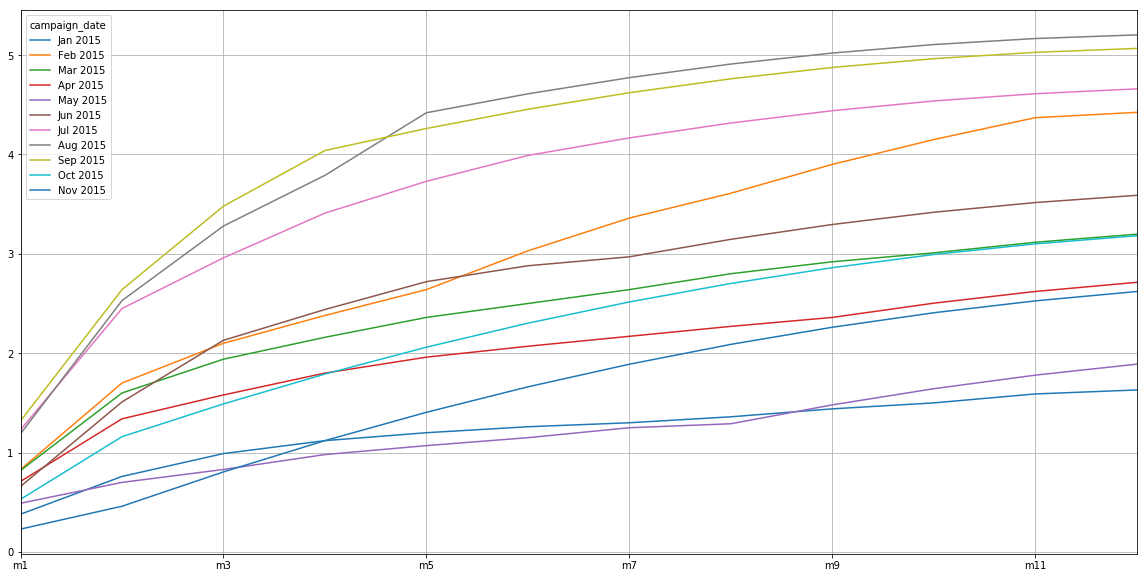

In [25]:
df_cohorts[mlist].transpose().plot(figsize=(20, 10), grid=True)

**3.3. Сделайте краткие выводы об эффективности кампании.**
- Кампании "Mar 2015", "Apr 2015", "May 2015" оказались убыточны. Возможно изза сезонности, нецелевого трафика или технических проблем.
- Поскольку показатели CPI и ARPU сильно рознятся то возможно есть несколько типов рекламных кампаний и целей, например нацеленные на узнаваемость бренда, конверсии в установки, активные игроки.

**3.4. Смоделируйте, какая может быть максимальная стоимость привлечения на одного игрока, чтобы обеспечить окупаемость кампании за 12 месяцев.**

In [26]:
avg_cpi = df_cohorts['campaign_cost_rub'].sum() / df_cohorts['installs'].sum()
avg_roi = df_cohorts['m12_revenue'].sum() / df_cohorts['campaign_cost_rub'].sum()
avg_cpi * avg_roi

3.085105610478075

В среднем за год для окупаемости кампаний CPI должен быть выше 3.08 RUB